# Teste Técnico para Ciência de Dados da Keyrus

## 1ª parte: Análise Exploratória

- [x] Tipos de variáveis
- [x] Medidas de posição
- [x] Medidas de dispersão
- [x] Tratamento de Missing Values
- [x] Gráficos
- [x] Análise de Outliers

## 2ª parte: Estatística

- [x] Estatística descritiva
- [x] Identificação das distribuições das variáveis

## 3ª parte: Modelagem

- [ ] Modelos de previsão
- [ ] Escolha de melhor modelo
- [ ] Avaliação de resultados
- [ ] Métricas

## Imports

In [75]:
# Data analysis and data wrangling
import statistics
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.ensemble import RandomForestClassifier  # enbedded method

# Other
from IPython.display import Image
import configparser
import warnings
import os

## Preparação do Diretório Principal

In [76]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [77]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/challenges/challenge-keyrus'

## Cell Format

In [163]:
config = configparser.ConfigParser()
config.read('src/visualization/plot_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

legend_loc = config['legend']['legend_loc']
legend_fontsize = int(config['legend']['legend_fontsize'])

In [164]:
# matplotlib rcParams
# ===================
plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout


# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

# Legend
plt.rcParams['legend.loc'] = legend_loc
plt.rcParams['legend.fontsize'] = legend_fontsize

In [165]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Carregamento dos Dados

In [128]:
%%time

df_callcenter = pd.read_csv('data/cleansing/callcenter_marketing_clenning.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 32.49 ms
Type conversion took: 27.45 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 3.43 ms
Type conversion took: 5.96 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 71.1 ms, sys: 7.89 ms, total: 79 ms
Wall time: 77 ms


**OBS**: carragamento em quase metade do tempo em relação a versão original do arquivo csv.

## Variáveis Globais

In [129]:
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [130]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [131]:
def get_col_without_target(df: 'dataframe',
                           list_columns: list,
                           target_col: str) -> list:

    col_target = list_columns.copy()
    
    col_target.remove(target_col)
    print(type(col_target))
    
    
    return col_target

In [132]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## Estatística Descritiva

- Medidas de Tendência Central
- Medidas de Forma
- Medidas de Dispersão 
- Medidas de Relação

In [133]:
df_callcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41172 entries, 0 to 41171
Data columns (total 20 columns):
idade                          41172 non-null int64
profissao                      41172 non-null int64
estado_civil                   41172 non-null int64
educacao                       41172 non-null int64
inadimplente                   41172 non-null int64
emprestimo_moradia             41172 non-null int64
emprestimo_pessoal             41172 non-null int64
meio_contato                   41172 non-null int64
mes                            41172 non-null int64
dia_da_semana                  41172 non-null int64
duracao                        41172 non-null int64
qtd_contatos_campanha          41172 non-null int64
dias_ultimo_contato            41172 non-null int64
qtd_contatos_total             41172 non-null int64
campanha_anterior              41172 non-null int64
indice_precos_consumidor       41172 non-null float64
indice_confianca_consumidor    41172 non-null float64
eur

### Medidas de Tendência Central

In [134]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get summary statistic 
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [135]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0,41172.0
mean,40.0233,3.62579,0.504809,3.19338,0.00014573,0.523851,0.151754,0.634703,6.60784,2.97965,4.67449,0.362018,1.18452,0.17303,0.16997,93.5753,-40.5028,3.62146,5166.85,0.112674
std,10.4205,2.40792,0.688424,2.15596,0.0170718,0.499437,0.358786,0.481519,2.04103,1.41152,0.958231,0.57675,1.19551,0.494985,0.45583,0.57991,4.62779,1.73453,72.3295,0.316197
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,0.0,1.0,0.0,0.0,93.08,-42.7,1.34,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,5.0,0.0,1.0,0.0,0.0,93.75,-41.8,4.86,5191.0,0.0
75%,47.0,4.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,5.0,1.0,1.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,98.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,27.0,7.0,2.0,94.77,-26.9,5.04,5228.0,1.0


---

### Medidas de Forma
- Mostram a forma da ditribuição dos dados.
- Identificação das distribuições das variáveis

#### Assimetria dos Dados (skew)
Quanto mais próximo estiver de 0, melhor (normal distribuition).

In [136]:
#  At this point I decided to use dataframe to maintain the same function pattern df.describe()
# However, dictionnaires are more recommended because they are faster in a few data.

def show_measures_shape(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['skew', 'kurtosis'] 
    df_temp = pd.DataFrame(index=[index])
        
    print("-"*25, "MEASURES OF SHAPE", "-"*25, end='\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(df[column].skew())
        list_temp.append(df[column].kurt())
        
        df_temp[column] = list_temp
    
    return df_temp

In [137]:
show_measures_shape(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SHAPE -------------------------


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
skew,0.784658,1.3228,1.01237,0.0784077,117.141,-0.0955169,1.94134,-0.55952,0.851654,0.000475985,-0.360973,1.46816,8.74011,3.83118,2.73689,-0.224524,0.302937,-0.70943,-1.0469,2.45002
kurtosis,0.791602,1.47119,-0.257504,-1.40392,13720.7,-1.99097,1.76889,-1.68702,-0.0277026,-1.29972,0.70796,1.76895,93.4114,20.0999,6.81699,-0.827637,-0.358897,-1.40645,0.00742682,4.0028


#### Análise Gráfica
- Histogramas são mais úteis para encontrar o tipo de distribuição dos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba26016908>,
      dtype=object)

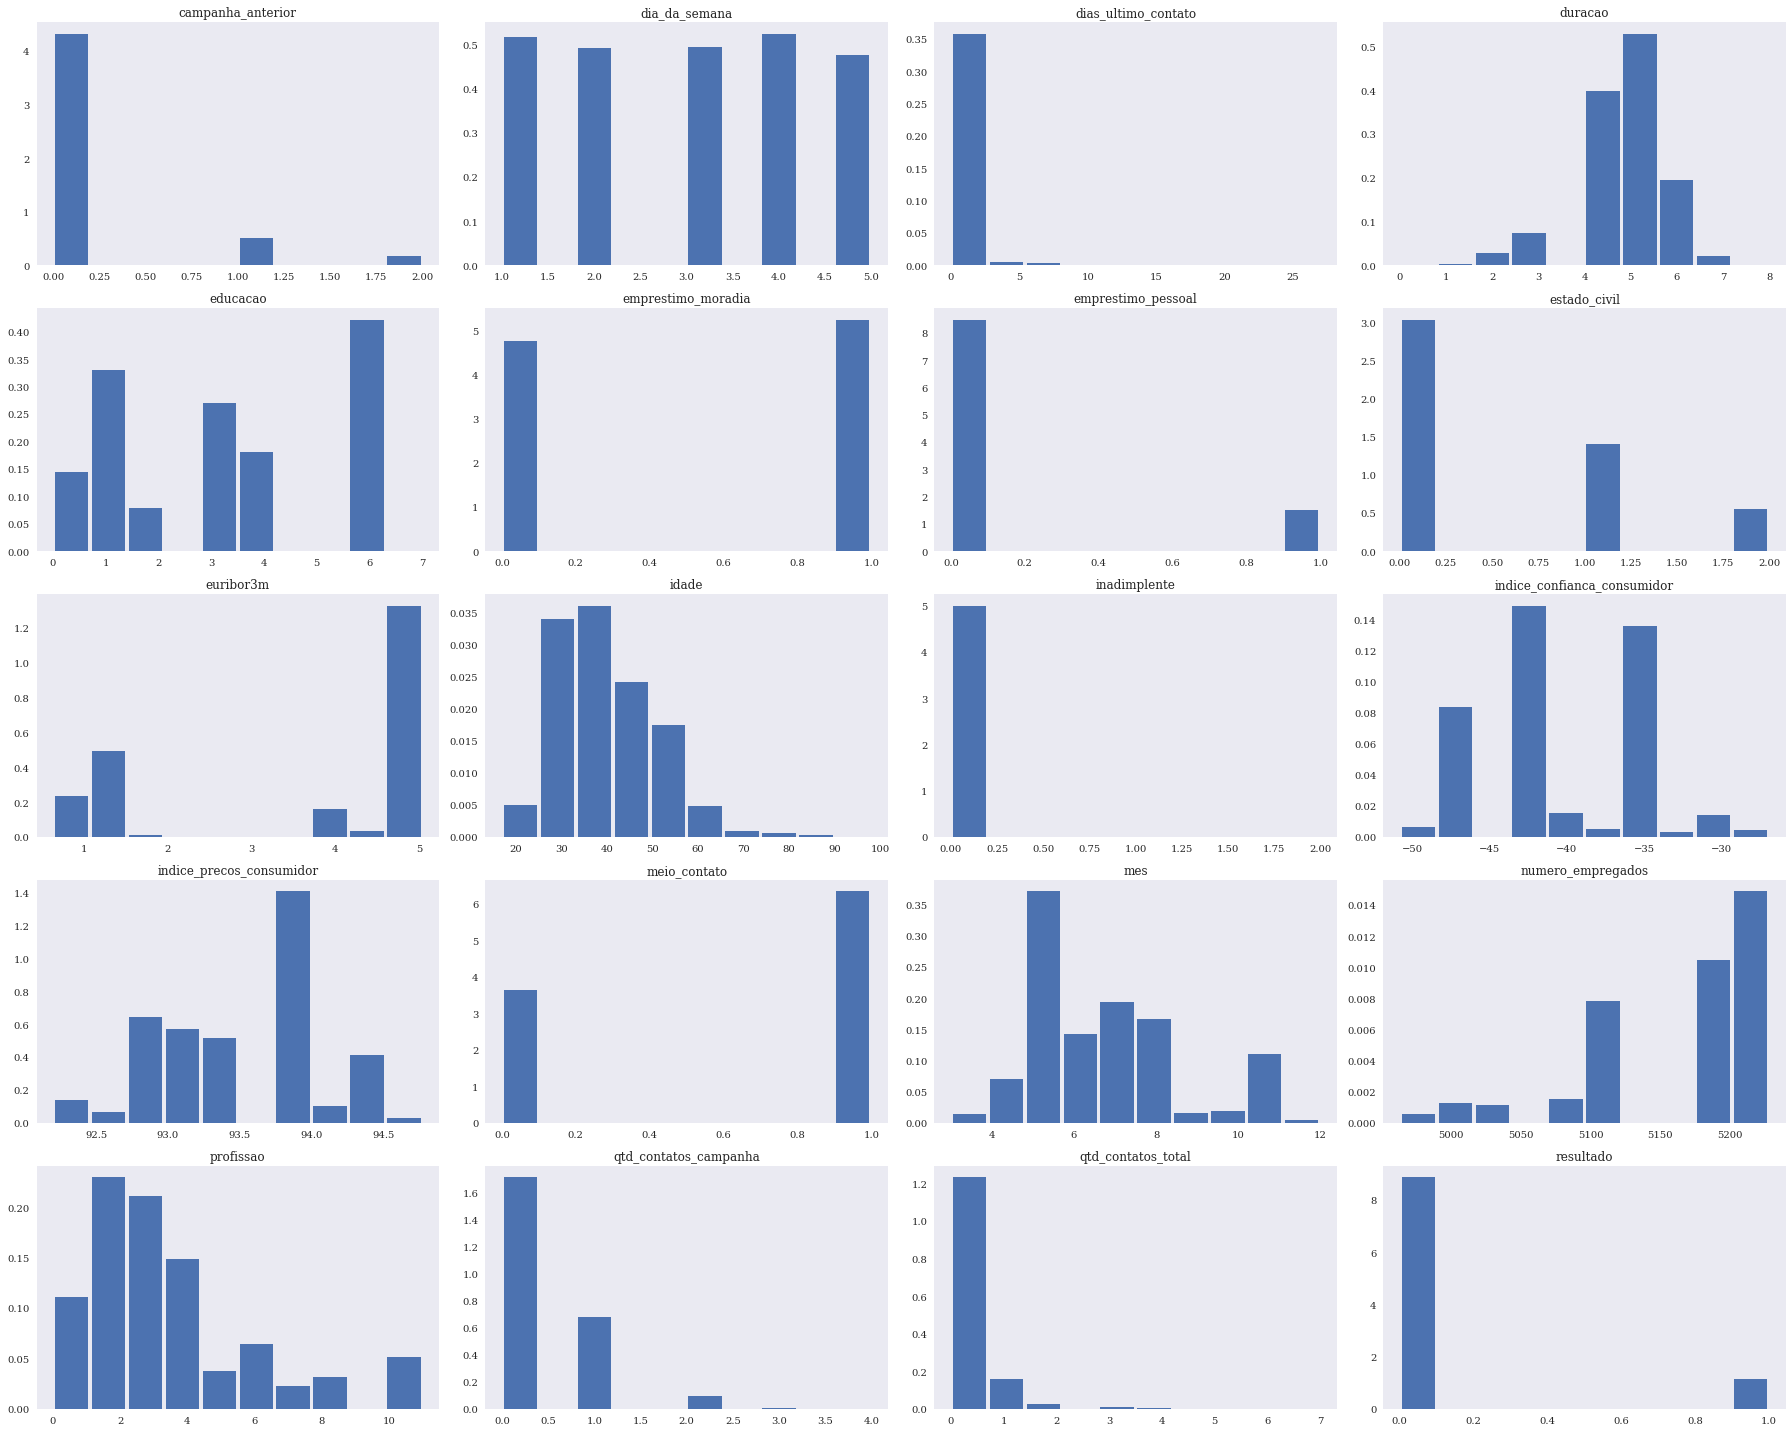

In [138]:
# Distribuition
df_callcenter[list_numerical_col].hist(figsize=[25,20],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9)

#### Notas
- Observando o dataframe gerado é possível notar que algumas features estão muito longe de uma distribuição normal. É o caso de: `inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A kurtose tambe apresenta valores muito discrepantes em :`inadimplente`, `dias_ultimo_contato` e `qtd_contatos_total`.
- A feature `inadimplente` é provinda de valores sim e não, por este motivo deu um valor tão discrepânte.
- Cabe **reanalisar** o processo de limpeza `dias_ultimo_contato` e `qtd_contatos_total`..

In [139]:
# reanalyze

list_col_reanalyze = ['dias_ultimo_contato','qtd_contatos_total']

- Simulando um **rescale**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba27170ba8>,
      dtype=object)

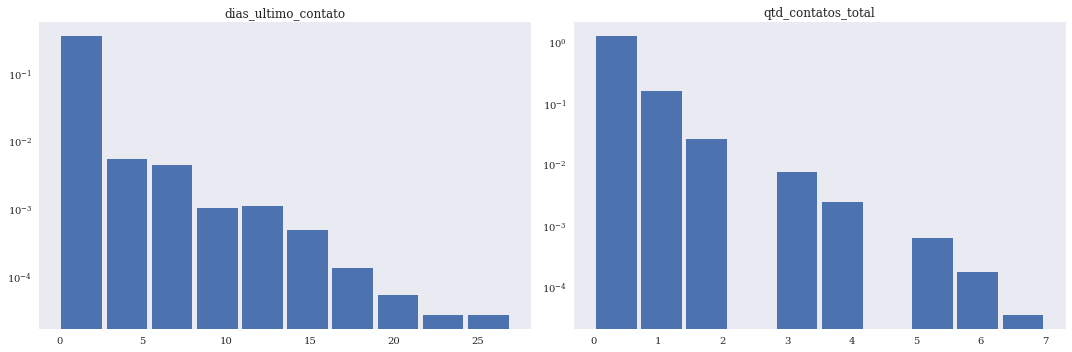

In [140]:
df_callcenter[list_col_reanalyze].hist(figsize=[15,5],
                                       density=True, 
                                       bins=10, 
                                       grid=False, 
                                       zorder=2, 
                                       rwidth=0.9,
                                       log=True)

#### Notas Sobre a Reanálise
- Ao simular uma aplicação de log afim de deixar as features mais próximas de uma distribuição gaussiana, houve uma grande diferença visual na distribuição.
- Para estas variáveis, será aplicado a técnica de **rescale**

#### `dias_ultimo_contato` e `qtd_contatos_total`
- Muitos dados da coluna `dias_ultimo_contato` e `qtd_contatos_total` são zeros, devido a isso é necessário adicionar uma correção para estes.
- Esta correção garante que os dados não vão tender ao infinito, até porque **log 0 = indefinido**
- O ideal é aplicar para o valor 0, **log 1 = 0** ou para dar mais peso log 2.

In [141]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

In [142]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'qtd_contatos_total')

'Skew before = 3.831179914382565 -> Skew after = 2.1250720833697336'

In [143]:
apply_log(df = df_callcenter,
          fix = 2,
          type_col = 'int16',
          column = 'dias_ultimo_contato')

'Skew before = 8.740110891712847 -> Skew after = 6.8460698723238895'

### Medidas de Dispersão

In [144]:
def show_measures_spread(df: 'dataframe', *columns: 'list') -> 'dataframe':
    index = ['std_deviation_pop',
            'std_deviation',
             'variance_pop',
             'variance',
             'maximum',
             'minimum'] 

    df_temp = pd.DataFrame(index=[index])
    
    print("-"*25, "MEASURES OF SPREAD", "-"*25, end='\n\n')
    
    for column in columns:
        list_temp = []
                
        list_temp.append(statistics.pstdev(df[column])) # population
        list_temp.append(statistics.stdev(df[column])) # sample
        list_temp.append(statistics.pvariance(df[column])) # population
        list_temp.append(statistics.variance(df[column])) # sample
        list_temp.append(df[column].max())
        list_temp.append(df[column].min())
        
        df_temp[column] = list_temp
    
    return df_temp

In [145]:
show_measures_spread(df_callcenter, *list_numerical_col)

------------------------- MEASURES OF SPREAD -------------------------



,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
std_deviation_pop,10.4203,2.40789,0.688415,2.15594,0.0170716,0.499431,0.358782,0.481513,2.041,1.41151,0.958219,0.576743,0.143276,0.344026,0.455824,0.579903,4.62773,1.7345,72.3286,0.316193
std_deviation,10.4205,2.40792,0.688424,2.15596,0.0170718,0.499437,0.358786,0.481519,2.04103,1.41152,0.958231,0.57675,0.143278,0.34403,0.45583,0.57991,4.62779,1.73453,72.3295,0.316197
variance_pop,108.584,5.79796,0.473915,4.64807,0.000291439,0.249431,0.128724,0.231855,4.1657,1.99235,0.918184,0.332632,0.0205281,0.118354,0.207776,0.336288,21.4159,3.00851,5231.42,0.0999783
variance,108.586,5.7981,0.473927,4.64818,0.000291446,0.249437,0.128728,0.231861,4.1658,1.9924,0.918207,0.33264,0.0205286,0.118357,0.207781,0.336296,21.4164,3.00858,5231.55,0.0999807
maximum,98.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,8.0,4.0,3.0,2.0,2.0,94.77,-26.9,5.04,5228.0,1.0
minimum,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0


### Medidas de Relação

In [146]:
df_callcenter.corr()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
idade,1.0,0.0203141,-0.116695,-0.106236,0.00189242,-0.00138074,-0.0071682,-0.00696114,0.0770959,-0.0184891,0.0075379,-0.00064183,0.019672,0.0168973,0.026407,0.00107812,0.129069,0.0107775,-0.0178294,0.030401
profissao,0.0203141,1.0,-0.00563249,0.159096,0.00487182,0.00486695,-0.00981004,0.0226636,0.0589006,0.0016966,0.0102302,-0.0171466,0.0333698,0.0431942,0.0500056,-0.051658,0.015962,-0.0777566,-0.0885839,0.0559217
estado_civil,-0.116695,-0.00563249,1.0,0.0641126,-0.00625968,0.00673073,-0.00157804,0.0435478,-0.00242618,-0.00442349,1.66232e-05,0.00567818,0.0127111,0.0300917,0.0288202,-0.023558,-0.0509348,-0.0537523,-0.0495496,0.0256852
educacao,-0.106236,0.159096,0.0641126,1.0,-0.000765701,0.0198751,0.0093804,0.1005,0.11919,0.00660905,-0.0198372,-0.000788886,0.0128905,0.0136245,0.02278,-0.0861348,0.0673612,-0.0235837,-0.022009,0.0422883
inadimplente,0.00189242,0.00487182,-0.00625968,-0.000765701,1.0,-0.00325639,-0.00361064,0.00647609,0.0100051,-0.00592464,-0.00600875,-0.00535826,-0.00116781,0.00487744,0.00305938,-0.00316859,0.00449369,0.00525885,0.00591888,-0.0030419
emprestimo_moradia,-0.00138074,0.00486695,0.00673073,0.0198751,-0.00325639,1.0,0.056656,0.0844065,0.0334086,-0.00940639,-0.00798575,-0.0056497,0.00178272,0.0246244,0.0234814,-0.081961,-0.0343642,-0.0590179,-0.0452166,0.0118206
emprestimo_pessoal,-0.0071682,-0.00981004,-0.00157804,0.0093804,-0.00361064,0.056656,1.0,0.0134088,-0.00168449,0.00183064,-0.00933958,0.00881651,-0.00352722,-0.000300013,-0.00044136,-0.00600058,-0.0136613,-0.000511266,0.00421791,-0.00449288
meio_contato,-0.00696114,0.0226636,0.0435478,0.1005,0.00647609,0.0844065,0.0134088,1.0,0.324421,-0.0195519,0.0537093,-0.0708643,0.0798451,0.242511,0.226892,-0.590489,-0.251542,-0.400375,-0.270028,0.144789
mes,0.0770959,0.0589006,-0.00242618,0.11919,0.0100051,0.0334086,-0.00168449,0.324421,1.0,-0.0068343,-0.029082,-0.0324948,0.0536945,0.0441814,0.0608641,-0.149856,0.2641,0.162941,0.130138,0.0371928
dia_da_semana,-0.0184891,0.0016966,-0.00442349,0.00660905,-0.00592464,-0.00940639,0.00183064,-0.0195519,-0.0068343,1.0,-0.0158527,0.00233824,-0.00595389,0.00743321,0.00326292,-0.00454467,1.77648e-05,-0.00534391,-0.000702777,0.00998184


#### Análise Gráfica

In [198]:
def plot_correlation(df):
    plt.figure(figsize = (25,20), facecolor=figure_facecolor, dpi=figure_dpi)
    plt.title('Correlation Features', y=1.00, size=28)

    correlation = df.corr(method='pearson')
    
    correlation_img = sns.heatmap(correlation, 
                                    annot=True, 
                                    cbar=True, 
                                    linecolor='white',
                                    linewidths=.1,
                                    cmap="RdYlGn")
    return correlation_img

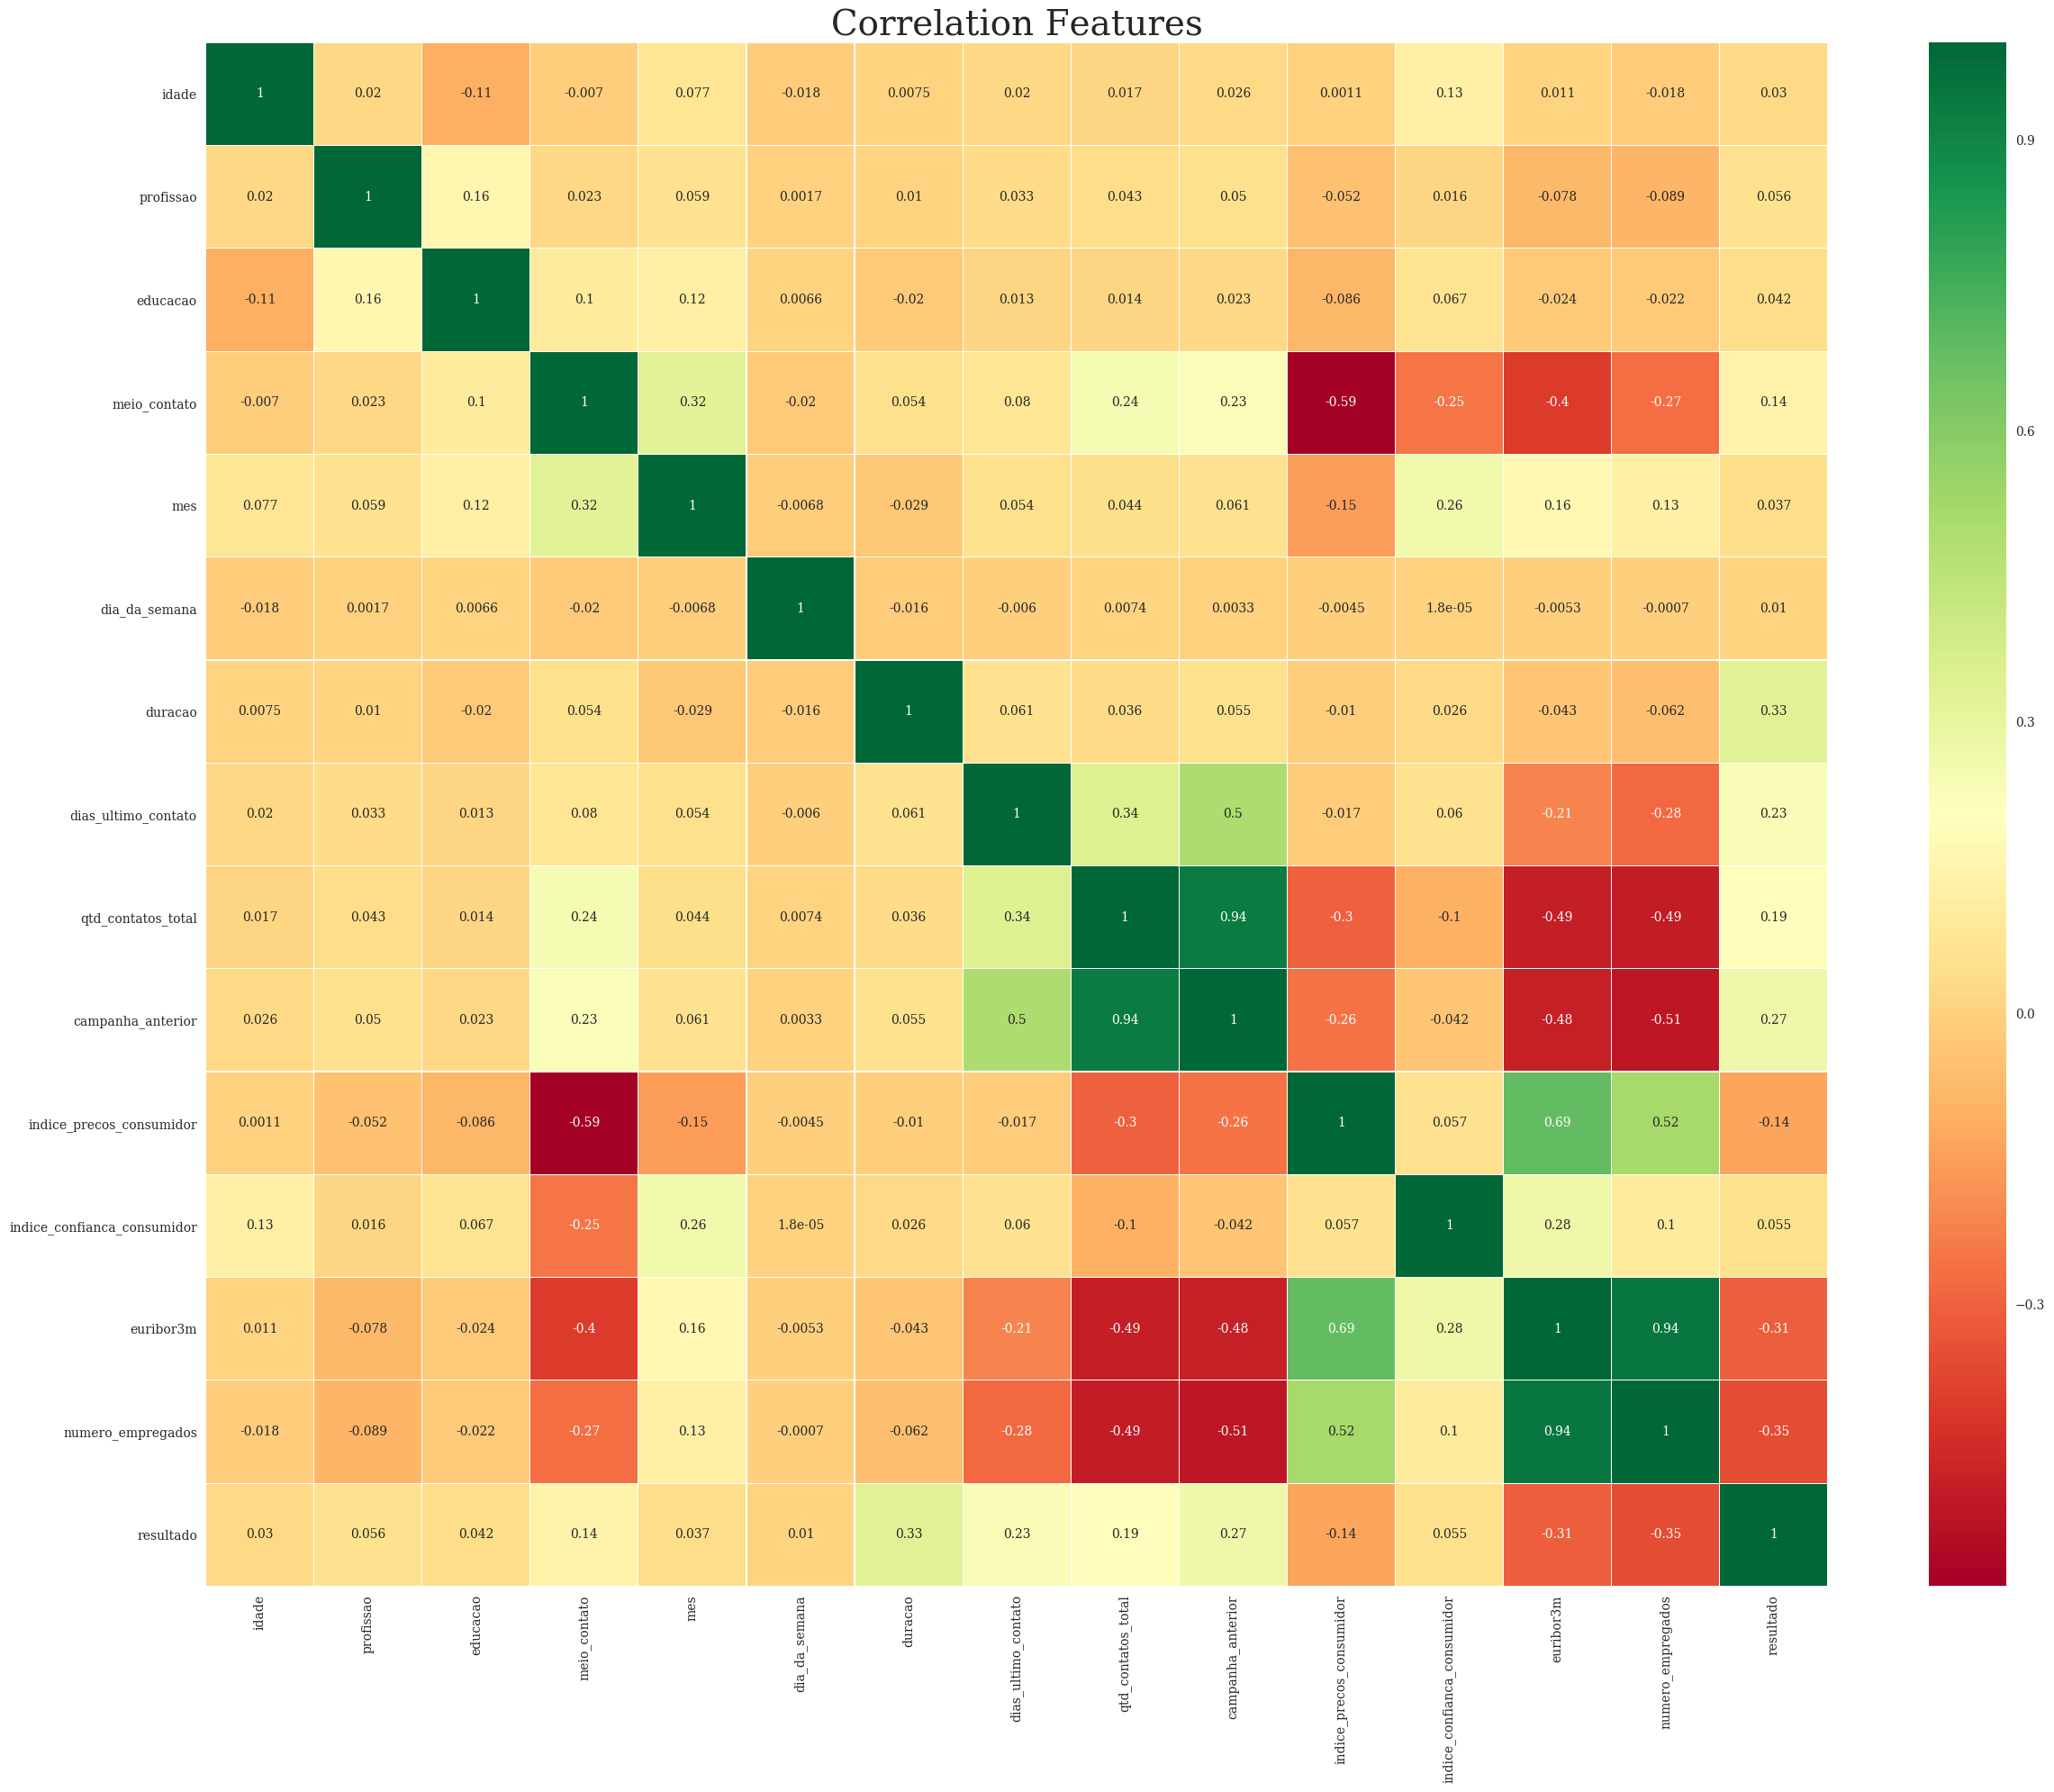

In [199]:
correlation_img = plot_correlation(df_callcenter)

- A imagem contem muitos detalhes. Melhor analisar fora do jupyter notebook

In [212]:
# savefig()

def save_image(img: 'matplotlib',
               name: str,
               path: str = 'reports/images/'):
    fig = img.get_figure()
    fig.savefig(f"reports/images/{name}.png")
    
    return f"Image {name} saved."

In [213]:
save_image(img=correlation_img, name='correlation')

'Image correlation saved.'

#### Gráficos Scatter

- Vou imprimir junções de gráficos scatter com os grupos de features, conforme fornecido no arquivo `callcenter_descricao.txt`

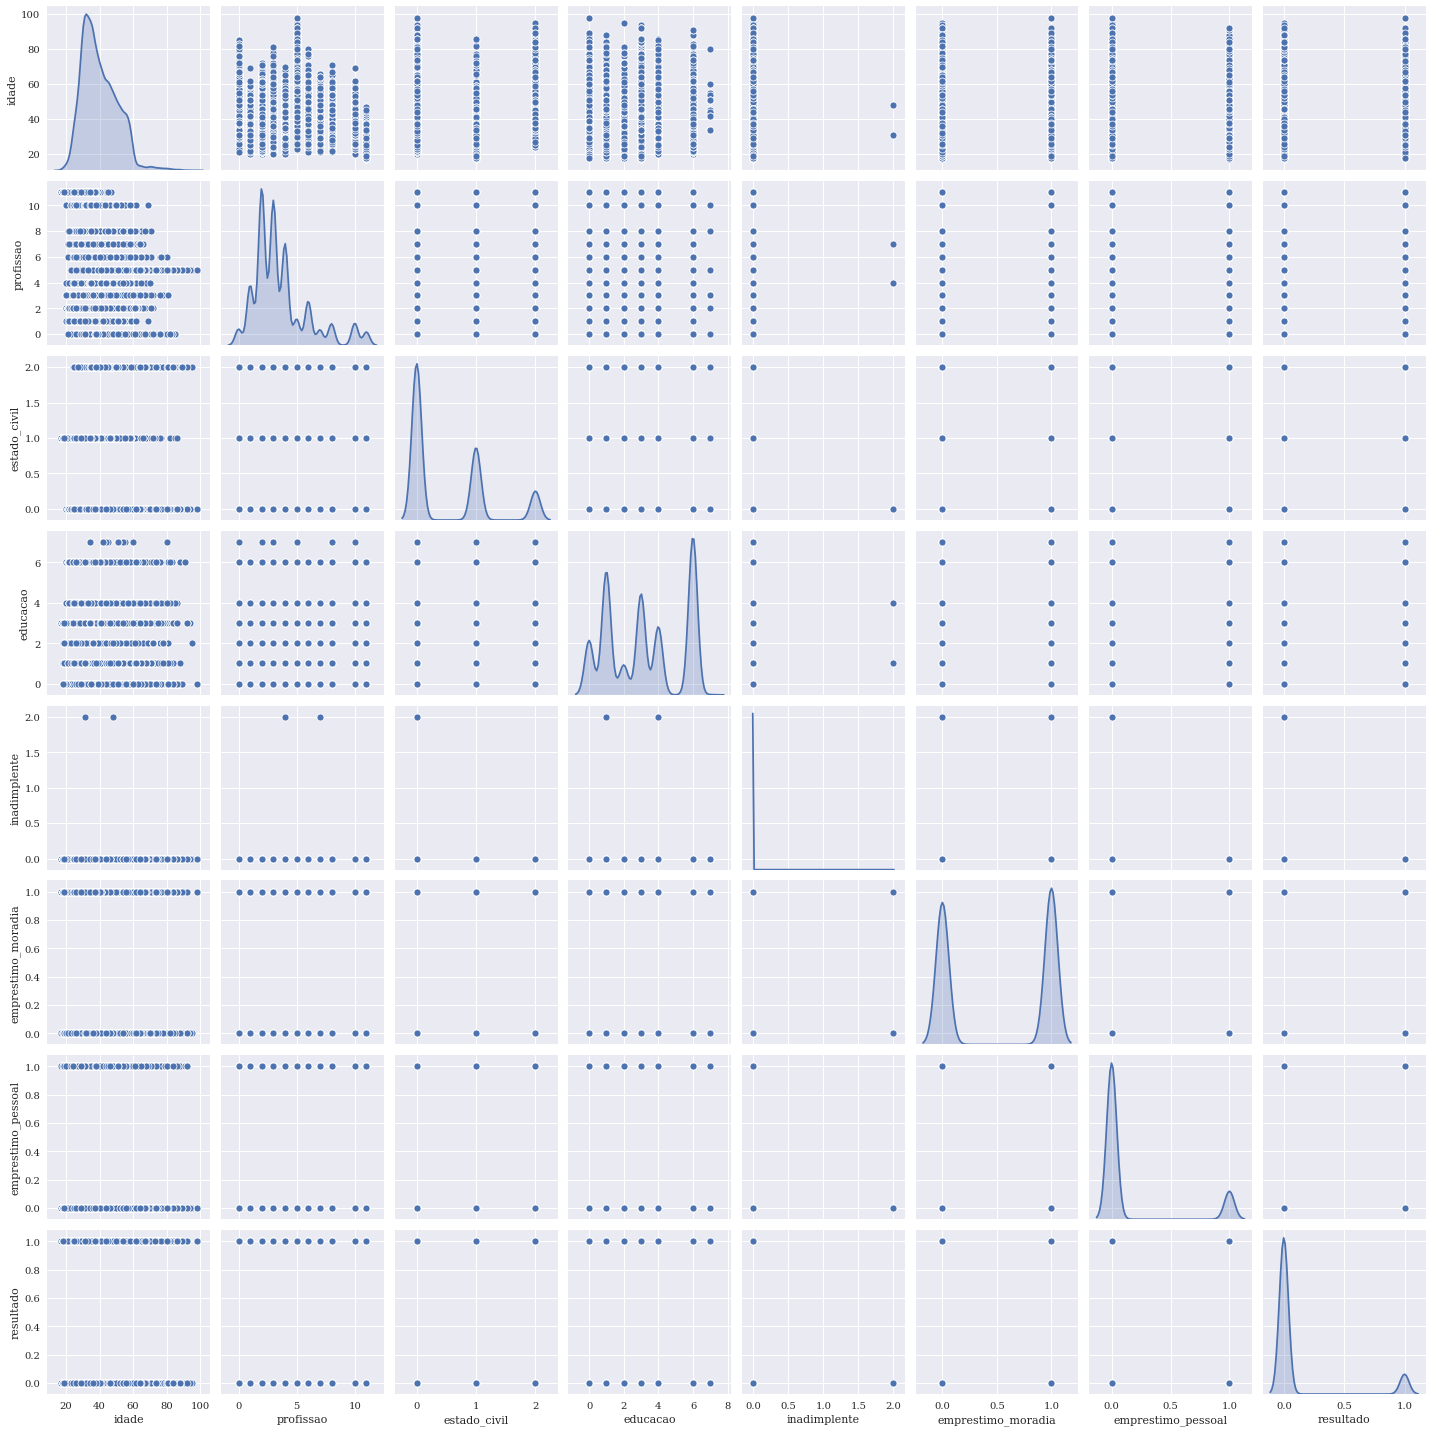

In [102]:
corr_client_data = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['idade',
                                             'profissao',
                                             'estado_civil',
                                             'educacao',
                                             'inadimplente',
                                             'emprestimo_moradia',
                                             'emprestimo_pessoal',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_client_data)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

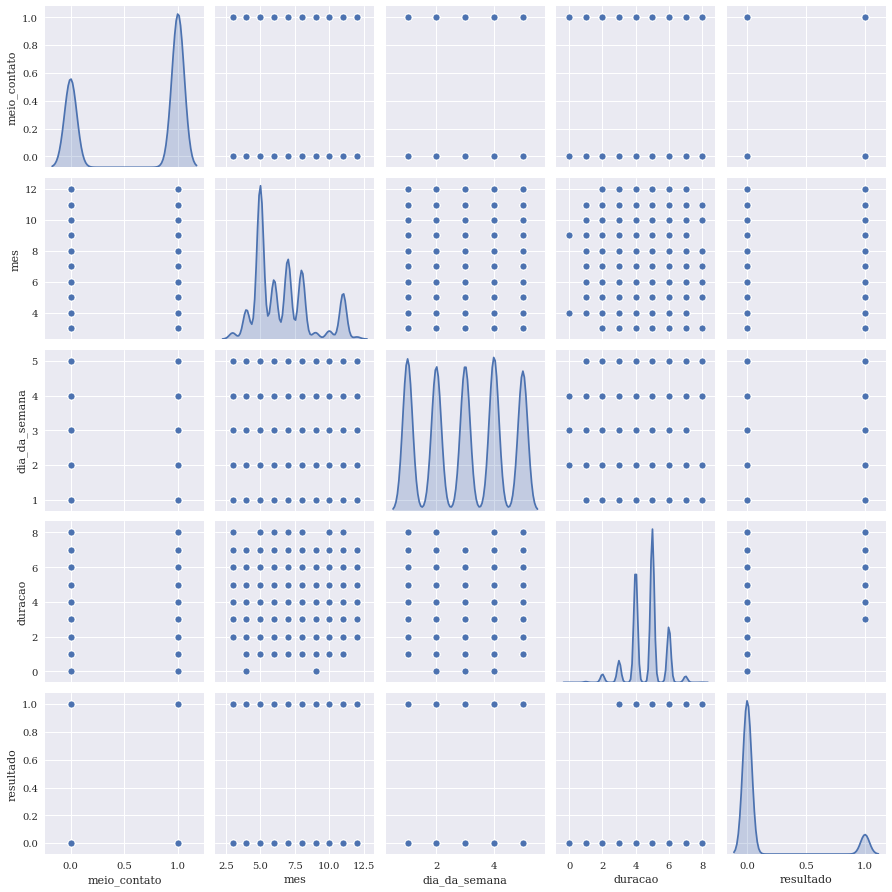

In [103]:
corr_last_contact = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['meio_contato',
                                             'mes',
                                             'dia_da_semana',
                                             'duracao',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_last_contact)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

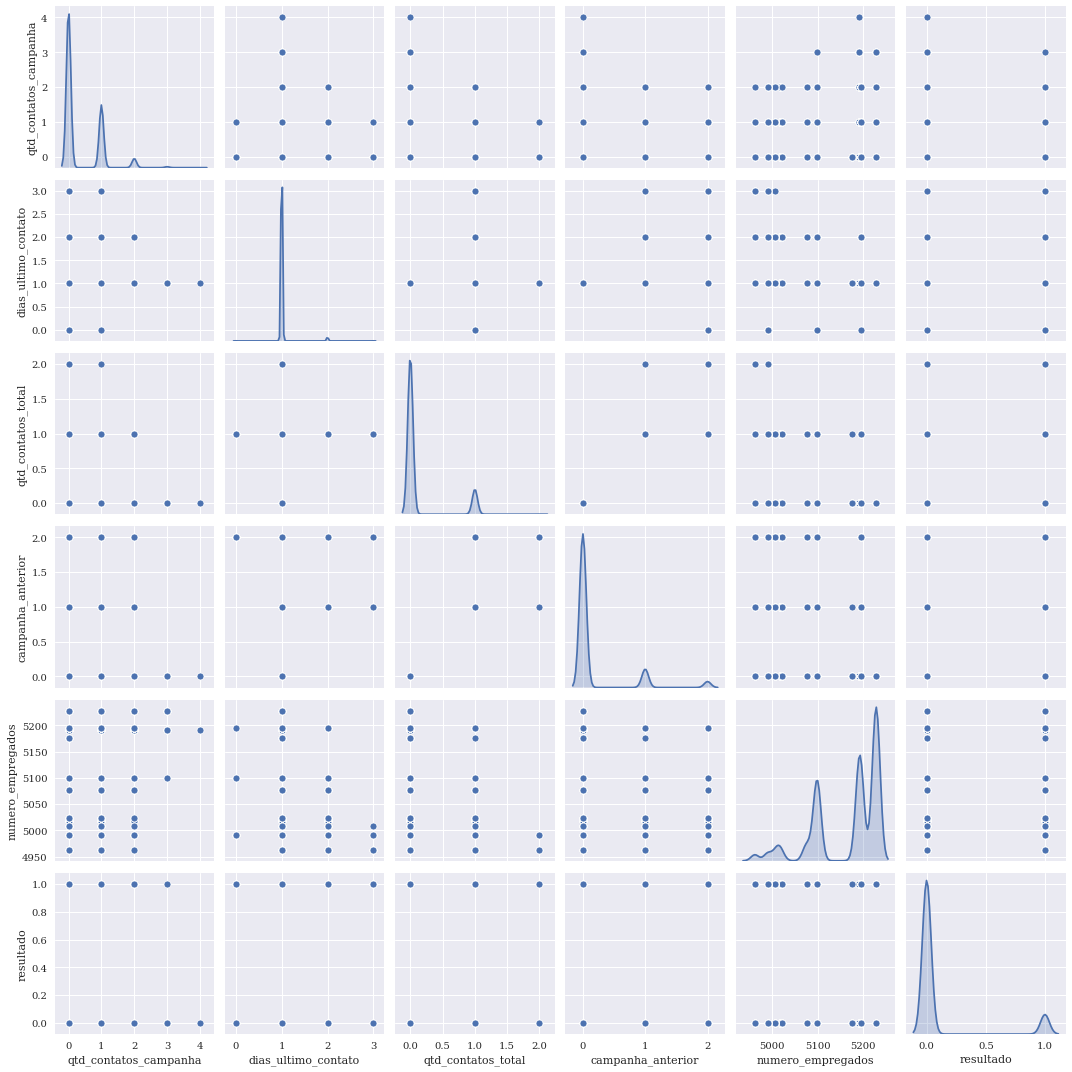

In [104]:
corr_other_var = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['qtd_contatos_campanha',
                                             'dias_ultimo_contato',
                                             'qtd_contatos_total',
                                             'campanha_anterior',
                                             'numero_empregados',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_other_var)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

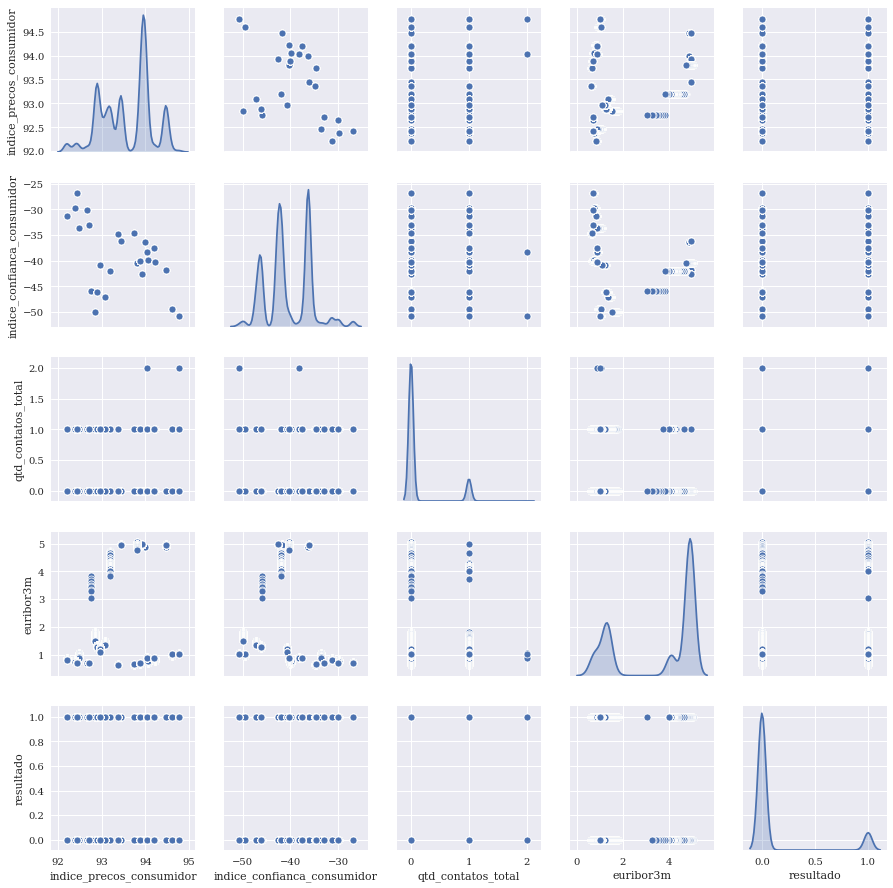

In [105]:
corr_indexes = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_precos_consumidor',
                                             'indice_confianca_consumidor',
                                             'qtd_contatos_total',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_indexes)

#### Notas
- Não há correlações visíveis entre as features e a variável target.

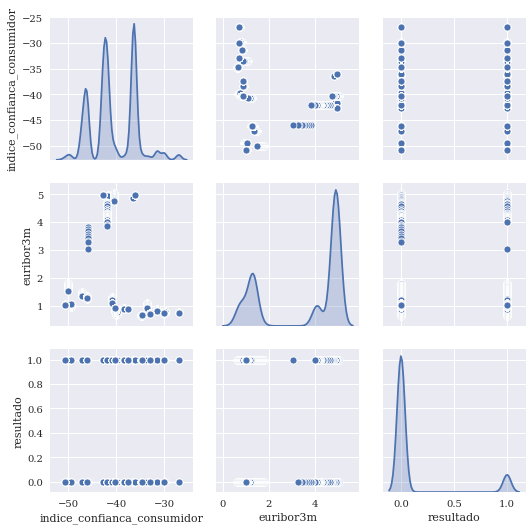

In [106]:
corr_until_inadimplente = sns.pairplot(df_callcenter[list_numerical_col], 
                                       vars=['indice_confianca_consumidor',
                                             'euribor3m',
                                             'resultado'],
                                       kind = 'scatter',
                                       diag_kind='kde')
display(corr_until_inadimplente)

#### Melhores Correlações

In [107]:
corrCatMatrix = df_callcenter[list_numerical_col].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.sort_values(kind="quicksort",ascending=False)
best_correlation = sortedSeries[sortedSeries != 1.0][0:20]


print("-"*25, "TOP CORRELATED IN PAIRS", "-"*25, end='\n\n')
print(best_correlation)

------------------------- TOP CORRELATED IN PAIRS -------------------------

numero_empregados         euribor3m                  0.944927
euribor3m                 numero_empregados          0.944927
qtd_contatos_total        campanha_anterior          0.937349
campanha_anterior         qtd_contatos_total         0.937349
indice_precos_consumidor  euribor3m                  0.686885
euribor3m                 indice_precos_consumidor   0.686885
indice_precos_consumidor  meio_contato               0.590489
meio_contato              indice_precos_consumidor   0.590489
indice_precos_consumidor  numero_empregados           0.52123
numero_empregados         indice_precos_consumidor    0.52123
campanha_anterior         numero_empregados          0.510139
numero_empregados         campanha_anterior          0.510139
campanha_anterior         dias_ultimo_contato        0.498284
dias_ultimo_contato       campanha_anterior          0.498284
numero_empregados         qtd_contatos_total         0.

#### Notas
- Entre as 20 melhores correlações, não há algum caso de correlação das features com a variável target (`resultado`)

#### Sem Correlações

- correlation = 0% com a feature `resultado`
- São feature totalmente independentes

In [108]:
def get_without_correlation(df, list_col, target_col):
    corrCatMatrix = df[list_col].corr().abs()

    s = corrCatMatrix.unstack()
    sortedSeries = s\
                    .sort_values(kind="quicksort",ascending=True)\
                        .get(target_col)

    without_correlation = sortedSeries[sortedSeries < 0.01][0:-1]

    print("-"*25, "WITHOUT CORRELATED WITH TARGET", "-"*25, end='\n\n')
    print(without_correlation)
    return without_correlation.index.tolist()

In [109]:
def remove_without_corr(df: 'dataframe', list_without_corr: list) -> int:
    print(f'Columns before = {df.shape[1]}')

    for column in list_without_corr:
        del df[column]
    
    return print(f"Columns after = {df.shape[1]}")

In [110]:
list_without_corr = get_without_correlation(df = df_callcenter,
                                            list_col = list_numerical_col,
                                            target_col = 'resultado')

remove_without_corr(df_callcenter, list_without_corr)

------------------------- WITHOUT CORRELATED WITH TARGET -------------------------

inadimplente          0.0030419
emprestimo_pessoal   0.00449288
dtype: float64
Columns before = 20
Columns after = 18


In [111]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])
list_without_target_col = get_col_without_target(df=df_callcenter,
                                                 list_columns=list_columns,
                                                 target_col='resultado')

Dataframe not contains <class 'object'> columns !
<class 'list'>


---

## Feature Importance
Vou utilizar uma decision tree para fazer uma feature selection.<br/>
A partir disso, vou ranquear as features mais importantes.

**OBS:** não necessariamente utilizarei um modelo de random forest. Neste momento só estou usando para descobrir quais são as variáveis de maior peso no modelo.

In [149]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=25):
    """
    Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
    """
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sorted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [150]:
# create model

rf = RandomForestClassifier(n_estimators=150, # numbers tree
                            max_depth=8,
                            min_samples_leaf=4,
                            max_features=0.2, # each tree utility 20% in the features
                            n_jobs=-1,
                            random_state=42)

In [151]:
# trainning model

rf.fit(df_callcenter[list_without_target_col], df_callcenter['resultado'])
features = df_callcenter[list_without_target_col].columns.values

print("---Traing Done---")

---Traing Done---


In [152]:
# get trained model (rf) and avalible the feature_importance
feature_importance = get_feature_importance_df(rf.feature_importances_, features)

# print feature_importance in the rf randomForest
display(feature_importance)

,feature,importance
0,duracao,0.309085
1,euribor3m,0.150527
2,numero_empregados,0.146089
3,campanha_anterior,0.0933029
4,indice_confianca_consumidor,0.0757649
5,indice_precos_consumidor,0.0594327
6,dias_ultimo_contato,0.033471
7,mes,0.0305476
8,idade,0.03027
9,meio_contato,0.0163558


[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, "Name's Variable"),
 Text(0.5, 1.0, 'Variable Importances')]

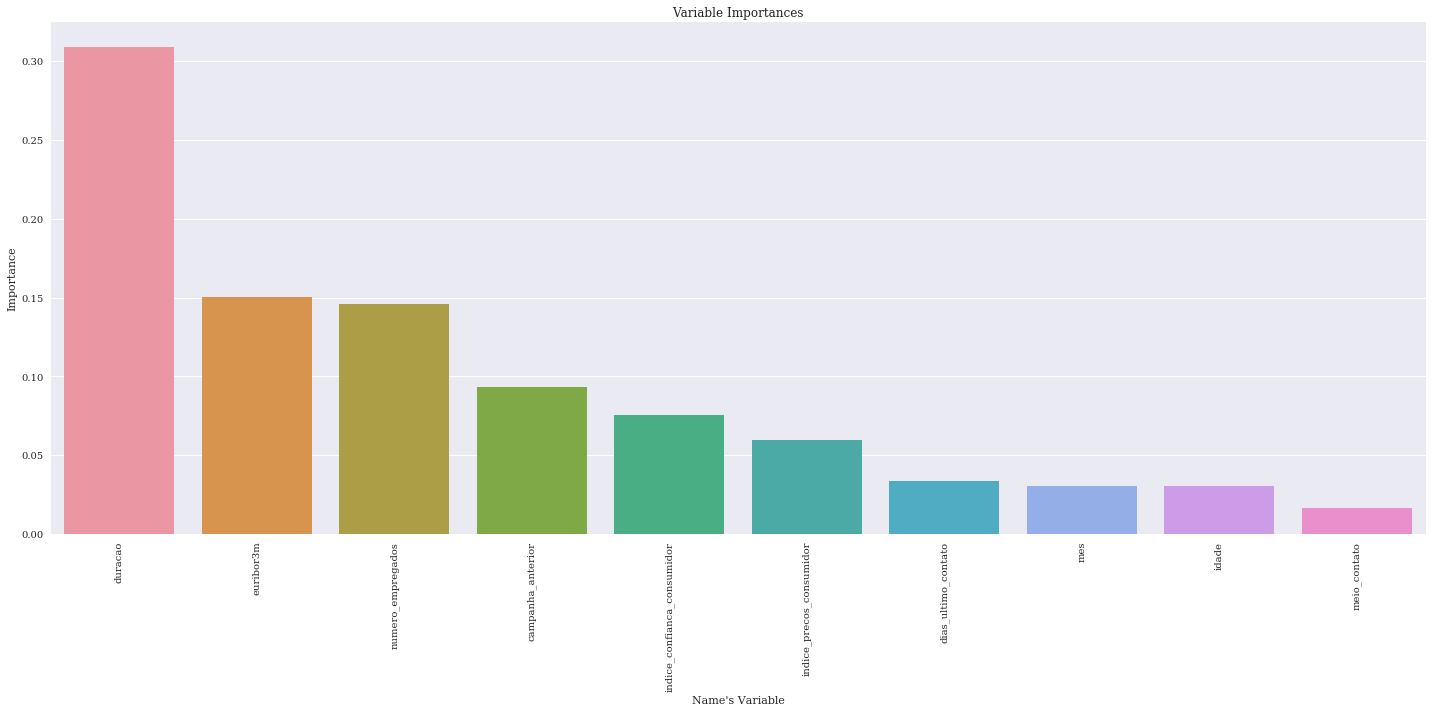

In [153]:
fig,ax = plt.subplots()
plt.xticks(rotation='vertical')

fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10], 
            x="feature", 
            y="importance", 
            ax=ax)
ax.set(xlabel="Name's Variable",
       ylabel='Importance',
       title="Variable Importances")

#### Eliminação de Feature Sem Importância

Ao eliminar features que não tem importância para o modelo fará com que o restante das features fiqeum mais ortogonais e diminuirá o ruído.

In [154]:
def get_without_importance(df_feature_importance: 'dataframe') -> list:
    list_drop_col = []
              
    cond_duracao = (df_feature_importance['importance'] < 0.005)
    df_temp = df_feature_importance[cond_duracao]
    
    list_drop_col = df_temp['feature'].tolist()
    
    print("-"*25, "FEATURE WITHOUT IMPORTANCE", "-"*25, end='\n\n')
    print(df_temp)
    return list_drop_col

In [155]:
def remove_without_importace(df: 'dataframe', list_without_imp: list) -> int:
    print(f'Columns before = {df.shape[1]}')
    
    for column in list_without_imp:
        del df[column]
        
    return print(f"Columns after = {df.shape[1]}")

In [156]:
list_without_importance = get_without_importance(df_feature_importance = feature_importance)

remove_without_importace(df = df_callcenter,
                        list_without_imp = list_without_importance)

------------------------- FEATURE WITHOUT IMPORTANCE -------------------------

                  feature  importance
14           estado_civil  0.00388885
15  qtd_contatos_campanha   0.0035633
16     emprestimo_moradia  0.00255675
17     emprestimo_pessoal  0.00203273
18           inadimplente         0.0
Columns before = 20
Columns after = 15


---

### Armazenamento dos Dados Limpos

In [157]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [158]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_clenning.csv')

'Data storage!'